<a href="https://colab.research.google.com/github/Aditya1026-05/music-recommendation-app-python/blob/main/Movie_Recommendation_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle -q

In [2]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

data collection

In [3]:
kaggle_config = json.load(open('kaggle.json'))
kaggle_config.keys()

dict_keys(['username', 'key'])

In [4]:
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [5]:
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 319MB/s]


In [6]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [7]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
df = pd.read_csv('/content/spotify_millsongdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [9]:
df.shape

(57650, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [11]:
top_artists = df['artist'].value_counts().head(10)
print('\nTop 10 Artists:')
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [12]:
df = df.sample(10000)

df = df.drop('link',axis = 1).reset_index(drop = True)

In [13]:
df.shape

(10000, 3)

In [14]:
df.head()

,artist,song,text
0,Bob Seger,Between,You're old enough to know better as soon \r\n...
1,Tim McGraw,Illegal,I put my money down on love again \r\nAt a hu...
2,Rolling Stones,Baby Break It Down,Baby break it down \r\nBaby break it down \r...
3,Dan Fogelberg,The Wild Places,I was walking alone through the lofty San Juan...
4,Louis Armstrong,East Of The Sun (And West Of The Moon),East of the sun and west of the moon \r\nWe'l...


In [15]:
# wordcloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)

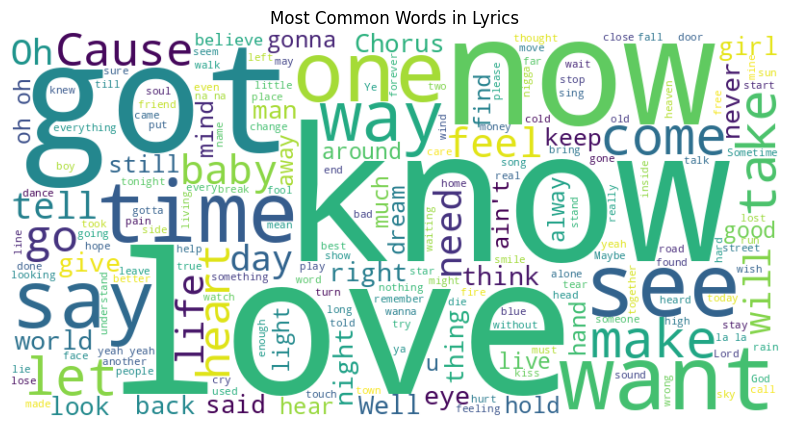

In [16]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Lyrics')
plt.show()

In [17]:
#dowanload nltk data'
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')            #used to remove the useless repititive words like the ,are ,oh etc...etc...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
def preprocess_text(text):
  #remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  #convert to lowercase
  text = text.lower()
  #tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [20]:
#Appling preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [21]:
df.head()

,artist,song,text,cleaned_text
0,Bob Seger,Between,You're old enough to know better as soon \r\n...,old enough know better soon see world get way ...
1,Tim McGraw,Illegal,I put my money down on love again \r\nAt a hu...,put money love hundred one mind losin try til ...
2,Rolling Stones,Baby Break It Down,Baby break it down \r\nBaby break it down \r...,baby break baby break got long way go baby bre...
3,Dan Fogelberg,The Wild Places,I was walking alone through the lofty San Juan...,walking alone lofty san juans heart full light...
4,Louis Armstrong,East Of The Sun (And West Of The Moon),East of the sun and west of the moon \r\nWe'l...,east sun west moon build dream house love dear...


In [22]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [23]:
#cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [28]:
def recommend_songs(song_name, cosine_sim=cosine_sim,df=df,top_n = 5):
  idx = df[df['song'].str.lower() == song_name.lower()].index
  if len(idx) == 0:
    return "Song not found!"          #can be reworked to compare for songs not present in the dataset
  idx = idx[0]

  #get similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  #song indices
  song_indices = [i[0] for i in sim_scores]

  # return top n similar songs
  return df[['artist','song']].iloc[song_indices]

In [25]:
df['song'][2]

'Baby Break It Down'

In [43]:
# Example recommendation
print('Recommended Songs(for Blinded by rainbows):')
print(recommend_songs("baby"))

Recommended Songs(for Blinded by rainbows):
                artist               song
3109       Demi Lovato               Baby
221   Barbra Streisand       Baby Me Baby
8005             Usher             Scream
9377      Adam Sandler  Food Innuendo Guy
8248       Patsy Cline  He Called Me Baby
